In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data_test=pd.read_csv('/home/cbe/AI4CHEM/reaction_predict/suzuki_with_label_180_add_ASKCOS(forward).csv')
data_test_v1=pd.read_csv('/home/cbe/AI4CHEM/reaction_predict/suzuki_with_label_180_with_sim.csv')

In [4]:
data_test['label_x1'] = data_test['label_x'].replace('S', 'Y')

<Figure size 640x480 with 0 Axes>

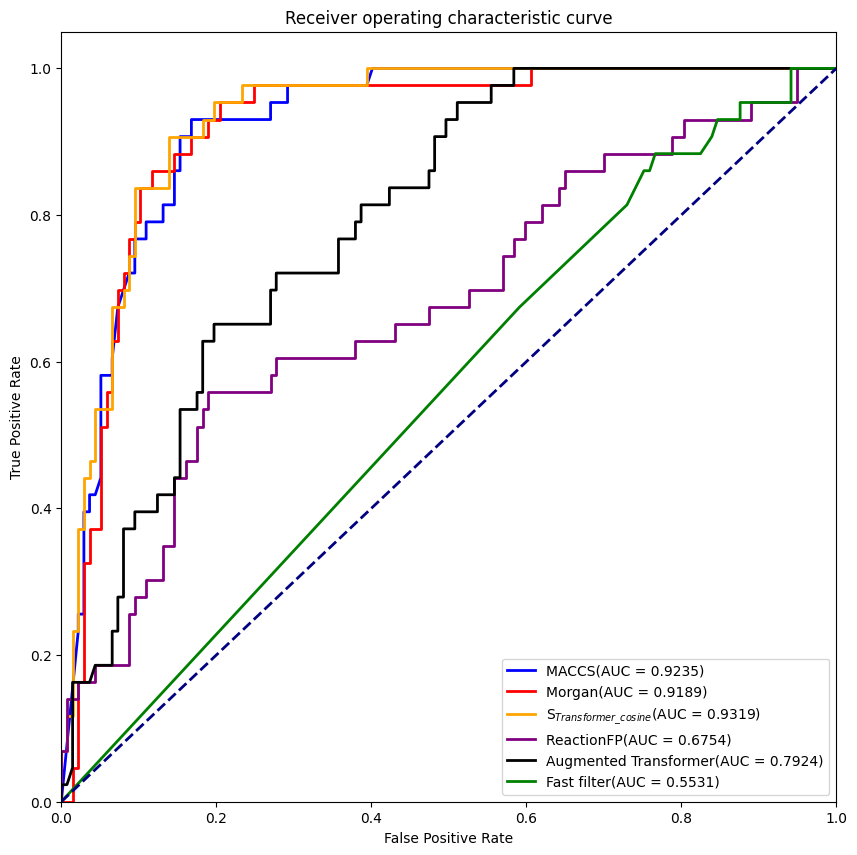

In [5]:
from sklearn import metrics
label_dict = {'N': 0, 'Y': 1}
y_true = data_test['label_x1'].map(label_dict).values

y_maccs_scores=data_test_v1['max_maccs_sim'].values
fpr_maccs_score,tpr_maccs_score,thresholdsmaccs_score = metrics.roc_curve(y_true, y_maccs_scores, pos_label=1)
roc_auc_maccs_score = metrics.auc(fpr_maccs_score,tpr_maccs_score)  # 计算auc的值

y_morgan_scores=data_test_v1['max_ecfp_sim'].values
fpr_morgan_score,tpr_morgan_score,thresholdsmorgan_score = metrics.roc_curve(y_true, y_morgan_scores, pos_label=1)
roc_auc_morgan_score = metrics.auc(fpr_morgan_score,tpr_morgan_score)  # 计算auc的值

y_transformer_scores=data_test_v1['max_sim'].values
fpr_transformer_score,tpr_transformer_score,thresholdstransformer_score = metrics.roc_curve(y_true, y_transformer_scores, pos_label=1)
roc_auc_transformer_score = metrics.auc(fpr_transformer_score,tpr_transformer_score)  # 计算auc的值

y_rxnfp_scores=data_test_v1['max_rxnfp_sim'].values
fpr_rxnfp_score,tpr_rxnfp_score,thresholdsrxnfp_score = metrics.roc_curve(y_true, y_rxnfp_scores, pos_label=1)
roc_auc_rxnfp_score = metrics.auc(fpr_rxnfp_score,tpr_rxnfp_score)  # 计算auc的值

y_ASKCOS_Forward_scores = data_test['ASKCOS Forward score'].values
fpr_ASKCOS_Forward_score,tpr_ASKCOS_Forward_score,thresholdsASKCOS_Forward_score = metrics.roc_curve(y_true, y_ASKCOS_Forward_scores, pos_label=1)
roc_auc_ASKCOS_Forward_score = metrics.auc(fpr_ASKCOS_Forward_score,tpr_ASKCOS_Forward_score)  # 计算auc的值

y_ASKCOS_score=data_test['ASKCOS score'].values
fpr_ASKCOS_score,tpr_ASKCOS_score,thresholdsASKCOS_score = metrics.roc_curve(y_true, y_ASKCOS_score, pos_label=1)
roc_auc_ASKCOS_score = metrics.auc(fpr_ASKCOS_score,tpr_ASKCOS_score)  # 计算auc的值

# 绘制roc曲线
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr_maccs_score, tpr_maccs_score, color='blue',lw=lw,label='MACCS(AUC = %0.4f)' % roc_auc_maccs_score)
plt.plot(fpr_morgan_score, tpr_morgan_score, color='red',lw=lw,label='Morgan(AUC = %0.4f)' % roc_auc_morgan_score)
plt.plot(fpr_transformer_score, tpr_transformer_score, color='orange',lw=lw,label='S$_{Transformer\_cosine}$(AUC = %0.4f)' % roc_auc_transformer_score)
plt.plot(fpr_rxnfp_score, tpr_rxnfp_score, color='purple',lw=lw,label='ReactionFP(AUC = %0.4f)' % roc_auc_rxnfp_score)
plt.plot(fpr_ASKCOS_Forward_score, tpr_ASKCOS_Forward_score, color='black',lw=lw,label='Augmented Transformer(AUC = %0.4f)' % roc_auc_ASKCOS_Forward_score)
plt.plot(fpr_ASKCOS_score, tpr_ASKCOS_score, color='green',lw=lw,label='Fast filter(AUC = %0.4f)' % roc_auc_ASKCOS_score)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

<Figure size 640x480 with 0 Axes>

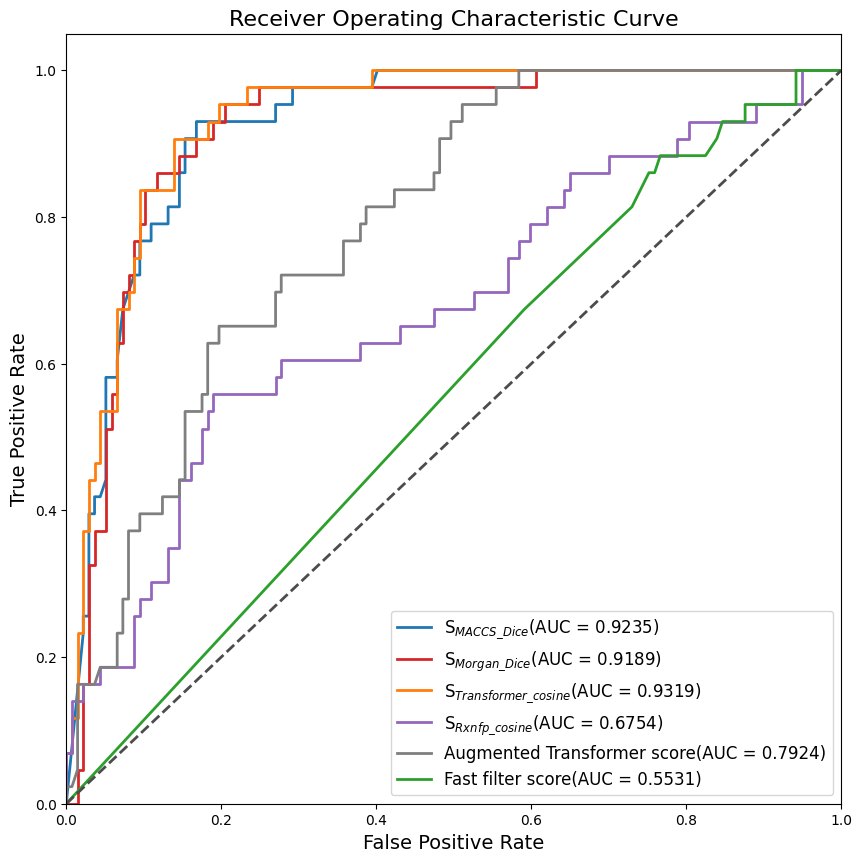

In [6]:
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
# Update color palette for better aesthetics and readability
colors = {
    'MACCS': '#1f77b4',           # Blue (darker)
    'Morgan': '#d62728',          # Red (slightly brighter)
    'Transformer_cosine': '#ff7f0e', # Orange (distinct, vibrant)
    'ReactionFP': '#9467bd',      # Purple (light)
    'ASKCOS_Forward': '#7f7f7f',  # Grey (balanced)
    'ASKCOS': '#2ca02c'           # Green (vibrant)
}

plt.plot(fpr_maccs_score, tpr_maccs_score, color=colors['MACCS'], lw=lw, label='S$_{MACCS\_Dice}$(AUC = %0.4f)' % roc_auc_maccs_score)
plt.plot(fpr_morgan_score, tpr_morgan_score, color=colors['Morgan'], lw=lw, label='S$_{Morgan\_Dice}$(AUC = %0.4f)' % roc_auc_morgan_score)
plt.plot(fpr_transformer_score, tpr_transformer_score, color=colors['Transformer_cosine'], lw=lw, label='S$_{Transformer\_cosine}$(AUC = %0.4f)' % roc_auc_transformer_score)
plt.plot(fpr_rxnfp_score, tpr_rxnfp_score, color=colors['ReactionFP'], lw=lw, label='S$_{Rxnfp\_cosine}$(AUC = %0.4f)' % roc_auc_rxnfp_score)
plt.plot(fpr_ASKCOS_Forward_score, tpr_ASKCOS_Forward_score, color=colors['ASKCOS_Forward'], lw=lw, label='Augmented Transformer score(AUC = %0.4f)' % roc_auc_ASKCOS_Forward_score)
plt.plot(fpr_ASKCOS_score, tpr_ASKCOS_score, color=colors['ASKCOS'], lw=lw, label='Fast filter score(AUC = %0.4f)' % roc_auc_ASKCOS_score)

# Plotting the baseline
plt.plot([0, 1], [0, 1], color='#4c4c4c', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
#plt.grid(True, linestyle='--', alpha=0.6)
#plt.show()
plt.savefig('Figure ROC Curve.png',dpi=600)